In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2021-09-07 16:17:36.337688: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Data Augmentation (generating extra training data)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 50,
                         epochs = 10,
                         validation_data = test_set)

/opt/conda/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1839: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2021-09-07 16:39:11.024065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-07 16:39:11.025905: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600010000 Hz


Epoch 1/10
50/50 [==============================] - 33s 660ms/step - loss: 0.7126 - accuracy: 0.5351 - val_loss: 0.6735 - val_accuracy: 0.5650
Epoch 2/10
50/50 [==============================] - 23s 459ms/step - loss: 0.6748 - accuracy: 0.5845 - val_loss: 0.6569 - val_accuracy: 0.6340
Epoch 3/10
50/50 [==============================] - 22s 435ms/step - loss: 0.6551 - accuracy: 0.6158 - val_loss: 0.6344 - val_accuracy: 0.6650
Epoch 4/10
50/50 [==============================] - 21s 424ms/step - loss: 0.6493 - accuracy: 0.6153 - val_loss: 0.7197 - val_accuracy: 0.5275
Epoch 5/10
50/50 [==============================] - 20s 405ms/step - loss: 0.6386 - accuracy: 0.6304 - val_loss: 0.6100 - val_accuracy: 0.6855
Epoch 6/10
50/50 [==============================] - 20s 397ms/step - loss: 0.6039 - accuracy: 0.6857 - val_loss: 0.6125 - val_accuracy: 0.6620
Epoch 7/10
50/50 [==============================] - 20s 395ms/step - loss: 0.6240 - accuracy: 0.6483 - val_loss: 0.6021 - val_accuracy: 0.6835

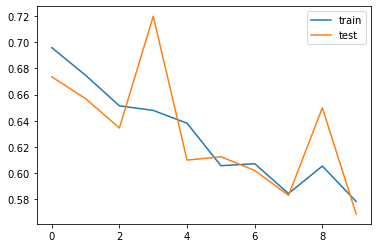

In [5]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('random_dog.png', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
